<a href="https://colab.research.google.com/github/shoaibriazkasra/Deep-Learning-Projects/blob/master/CatvsDog_convnet_that_includes_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip 'drive/My Drive/Cats-Dogs-small.zip'

Archive:  drive/My Drive/Cats-Dogs-small.zip
   creating: Cats-Dogs-small/test/
   creating: Cats-Dogs-small/test/cats/
  inflating: Cats-Dogs-small/test/cats/cat.1500.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1501.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1502.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1503.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1504.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1505.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1506.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1507.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1508.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1509.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1510.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1511.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1512.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1513.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1514.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1515.jpg  
  inflating: Cat

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
'Cats-Dogs-small/train/',
target_size=(150, 150),
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
'Cats-Dogs-small/validation/',
target_size=(150, 150),
batch_size=32,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.



Epoch 1/100





100/100 [==============================] - 35s 351ms/step - loss: 0.6936 - acc: 0.5228 - val_loss: 0.6990 - val_acc: 0.4962
Epoch 2/100
100/100 [==============================] - 26s 263ms/step - loss: 0.6899 - acc: 0.5334 - val_loss: 0.6733 - val_acc: 0.6231
Epoch 3/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6713 - acc: 0.5928 - val_loss: 0.7065 - val_acc: 0.5247
Epoch 4/100
100/100 [==============================] - 26s 264ms/step - loss: 0.6572 - acc: 0.6156 - val_loss: 0.6315 - val_acc: 0.6546
Epoch 5/100
100/100 [==============================] - 25s 252ms/step - loss: 0.6412 - acc: 0.6272 - val_loss: 0.6379 - val_acc: 0.6212
Epoch 6/100
100/100 [==============================] - 28s 280ms/step - loss: 0.6297 - acc: 0.6487 - val_loss: 0.5915 - val_acc: 0.6804
Epoch 7/100
100/100 [==============================] - 26s 262ms/step - loss: 0.6097 - acc: 

In [0]:
model.save('cats_and_dogs_small_Aug_dropout.h5')

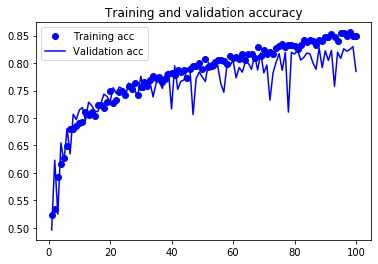

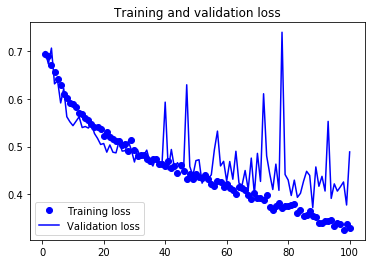

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()